###Importation des bibliothèques et installation

In [ ]:
!pip install kagglehub pandas numpy matplotlib seaborn scikit-learn tensorflow

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

###Compréhension des données

In [ ]:
# Télécharger depuis Kaggle
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

# Localiser le fichier CSV
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".csv"):
            csv_path = os.path.join(root, file)
            break

# Charger dans un DataFrame
df = pd.read_csv(csv_path)

print("Nombre de lignes et colonnes :", df.shape)
print("Colonnes :", df.columns.tolist())
print(df.head())

Nombre de lignes et colonnes : (1470, 35)
Colonnes : ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequen

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<ipython-input-35-ff603a0388da>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_labels, y=attrition_counts.values, palette=palette)


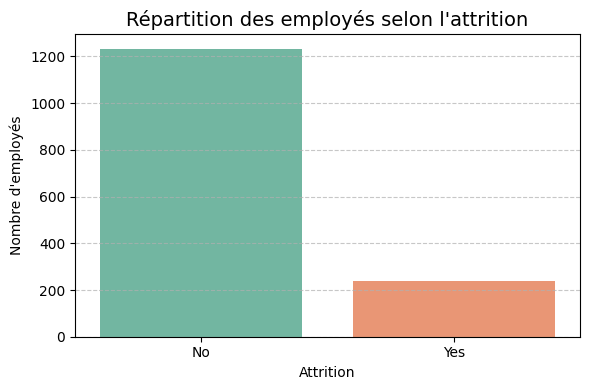

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir la palette
palette = ["#66c2a5", "#fc8d62"]

# Compter les valeurs de la cible
attrition_counts = df['Attrition'].value_counts().sort_index()

# Reconvertir si c'est déjà encodé en 0/1 :
attrition_labels = ['No', 'Yes'] if set(attrition_counts.index) == {0, 1} else attrition_counts.index

# Affichage du graphique
plt.figure(figsize=(6, 4))
sns.barplot(x=attrition_labels, y=attrition_counts.values, palette=palette)
plt.title("Répartition des employés selon l'attrition", fontsize=14)
plt.ylabel("Nombre d'employés")
plt.xlabel("Attrition")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


###Préparation des données


In [ ]:
mappings = {
    'Education': {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'},
    'EnvironmentSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'JobInvolvement': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'JobSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'PerformanceRating': {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'},
    'RelationshipSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'WorkLifeBalance': {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
}
for col, mapping in mappings.items():
    df[col] = df[col].map(mapping)

In [ ]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [ ]:
df.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']
feature_names = X.columns

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

###Modélisation

In [ ]:
model_full = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model_full.fit(X_train_full, y_train_full)

RandomForestClassifier(max_depth=5, random_state=42)

###Évaluation

In [ ]:
y_pred_train_full = model_full.predict(X_train_full)
y_pred_test_full = model_full.predict(X_test_full)

print("Accuracy (Train) :", accuracy_score(y_train_full, y_pred_train_full))
print("Accuracy (Test)  :", accuracy_score(y_test_full, y_pred_test_full))
print("--- Rapport Test ---")
print(classification_report(y_test_full, y_pred_test_full))

Accuracy (Train) : 0.8732993197278912
Accuracy (Test)  : 0.8333333333333334
--- Rapport Test ---
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       247
           1       0.33      0.04      0.08        47

    accuracy                           0.83       294
   macro avg       0.59      0.51      0.49       294
weighted avg       0.76      0.83      0.78       294



###Modélisation (features)

In [ ]:
importances = model_full.feature_importances_
feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n=== IMPORTANCE DES FEATURES ===")
print(feat_importances.head(15))


=== IMPORTANCE DES FEATURES ===
                        Feature  Importance
10            TotalWorkingYears    0.093502
5                 MonthlyIncome    0.092042
0                           Age    0.080800
12               YearsAtCompany    0.067464
49                 OverTime_Yes    0.052833
15         YearsWithCurrManager    0.046978
2              DistanceFromHome    0.044275
1                     DailyRate    0.042642
9              StockOptionLevel    0.041605
3                    HourlyRate    0.037834
7            NumCompaniesWorked    0.030862
6                   MonthlyRate    0.029220
13           YearsInCurrentRole    0.026037
48         MaritalStatus_Single    0.023032
29  EnvironmentSatisfaction_Low    0.022141


In [ ]:
top_features = feat_importances.head(15)['Feature'].tolist()
X_top = X[top_features]

In [ ]:
X_top_train, X_top_test, y_top_train, y_top_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)

scaler_top = StandardScaler()
X_top_train_scaled = scaler_top.fit_transform(X_top_train)
X_top_test_scaled = scaler_top.transform(X_top_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_top = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)

model_top.fit(X_top_train_scaled, y_top_train)


RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

###Évaluation

In [ ]:
# Prédictions
y_pred_top_test = model_top.predict(X_top_test_scaled)
y_pred_top_train = model_top.predict(X_top_train_scaled)

# Évaluations
print("Accuracy (train) après sélection :", accuracy_score(y_top_train, y_pred_top_train))
print("Accuracy (test) après sélection  :", accuracy_score(y_top_test, y_pred_top_test))
print("--- Rapport classification (test) ---")
print(classification_report(y_top_test, y_pred_top_test))

Accuracy (train) après sélection : 0.8835034013605442
Accuracy (test) après sélection  : 0.8027210884353742
--- Rapport classification (test) ---
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       255
           1       0.30      0.36      0.33        39

    accuracy                           0.80       294
   macro avg       0.60      0.61      0.61       294
weighted avg       0.82      0.80      0.81       294



###Sauvegarde

In [ ]:
joblib.dump(model_top, "modele_attrition_reduit.pkl")
joblib.dump(scaler_top, "scaler_attrition_reduit.pkl")
joblib.dump(top_features, "colonnes_utilisees_reduit.pkl")

print("Modèle réduit, scaler et features sauvegardés.")

Modèle réduit, scaler et features sauvegardés.


###Test

In [ ]:
import joblib
import pandas as pd

# Charger le modèle, le scaler, et les colonnes utilisées
model = joblib.load("modele_attrition_reduit.pkl")
scaler = joblib.load("scaler_attrition_reduit.pkl")
colonnes = joblib.load("colonnes_utilisees_reduit.pkl")

# Exemple d'employé (15 colonnes utilisées)
employe = {
    'TotalWorkingYears': 6,
    'MonthlyIncome': 4200,
    'Age': 29,
    'YearsAtCompany': 4,
    'OverTime_Yes': 1,
    'YearsWithCurrManager': 2,
    'DistanceFromHome': 5,
    'DailyRate': 800,
    'StockOptionLevel': 0,
    'HourlyRate': 80,
    'NumCompaniesWorked': 1,
    'MonthlyRate': 13000,
    'YearsInCurrentRole': 2,
    'MaritalStatus_Single': 0,
    'EnvironmentSatisfaction_Low': 0
}

# Transformation en DataFrame
df_input = pd.DataFrame([employe])

# Ajouter les colonnes manquantes si nécessaire
for col in colonnes:
    if col not in df_input.columns:
        df_input[col] = 0

# Réorganiser les colonnes dans le bon ordre
df_input = df_input[colonnes]

# Standardisation avec conservation des noms de colonnes
df_scaled = pd.DataFrame(scaler.transform(df_input), columns=colonnes)

# Prédiction
pred = model.predict(df_scaled)[0]
proba = model.predict_proba(df_scaled)[0][1]

# Résultat
print("Prédiction :", "L'employé va QUITTER l'entreprise" if pred == 1 else "L'employé va RESTER")
print("Probabilité de quitter :", round(proba * 100, 2), "%")


Prédiction : L'employé va QUITTER l'entreprise
Probabilité de quitter : 53.52 %
